# <font color="red"> For now this is a demo file please don't edit it or even run it (if you want to you can copy into your respective file)</font>

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import os
import cv2

import matplotlib.pyplot as plt
import matplotlib as mpl

from utils import load_everything

dark_mode = True
if dark_mode:
    COLOR = '#bbccd5'
    BG = '#23272a'
    # print(mpl.rcParams.keys()) # see all params
    mpl.rcParams['text.color'] = COLOR
    mpl.rcParams['axes.labelcolor'] = COLOR
    mpl.rcParams['xtick.color'] = COLOR
    mpl.rcParams['ytick.color'] = COLOR
    mpl.rcParams['figure.facecolor'] = BG
    mpl.rcParams['figure.figsize'] = [16, 9]

## Load the data

In [2]:
dataset, (x_train, x_test, y_train, y_test) = load_everything(os.path.join('..', 'datasets'))

In [3]:
print(dataset.describe)

<bound method NDFrame.describe of                 img_name img_source   fire  pos_y  pos_x  wind_direction  \
0     1188-176225_sat_51  DeepGlobe   True  100.0  174.0        4.259894   
1     5712-242583_sat_10  DeepGlobe  False    NaN    NaN             NaN   
2     0247-784518_sat_67  DeepGlobe   True   99.0   74.0        6.264771   
3     5777-208695_sat_71  DeepGlobe  False    NaN    NaN             NaN   
4     2836-255876_sat_31  DeepGlobe  False    NaN    NaN             NaN   
...                  ...        ...    ...    ...    ...             ...   
6703  3772-739760_sat_82  DeepGlobe  False    NaN    NaN             NaN   
6704           5191-d211     RSSCN7  False    NaN    NaN             NaN   
6705           5226-d040     RSSCN7  False    NaN    NaN             NaN   
6706           5390-a003     RSSCN7  False    NaN    NaN             NaN   
6707  0860-605764_sat_66  DeepGlobe  False    NaN    NaN             NaN   

      wind_strength  
0          0.238864  
1        

In [4]:
x_train.shape

(5031, 256, 256, 3)

In [5]:
y_train

array([ True, False,  True, ..., False, False,  True])

## some demos on how to use the data

In [6]:
from sklearn.decomposition import PCA
sample_size = 1000
sample = x_train[:sample_size]
pca = PCA(n_components=100)
pca_sample = pca.fit_transform(np.reshape(sample, (len(sample), -1)))
pca_sample.shape

(1000, 100)

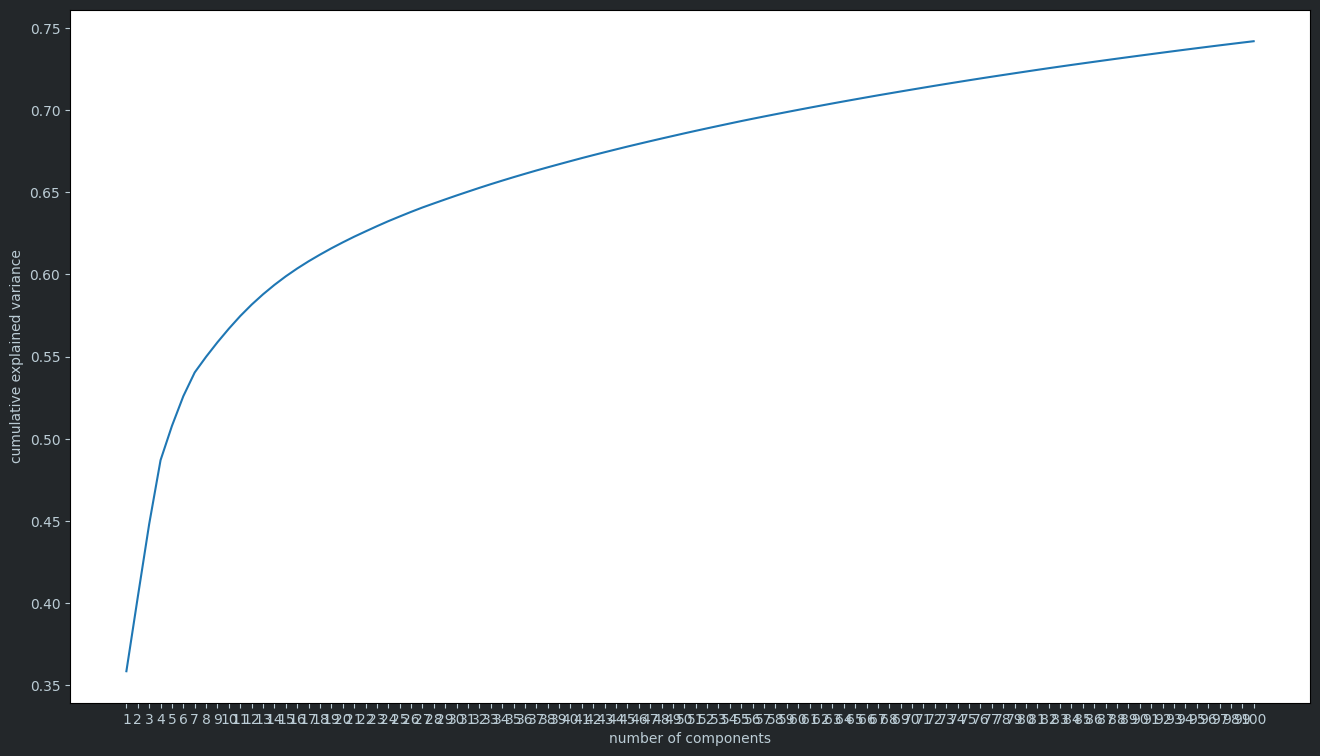

In [7]:
components = len(pca.explained_variance_ratio_) + 1

plt.plot(range(1,components), np.cumsum(pca.explained_variance_ratio_)) 
plt.xticks(range(1,components))  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

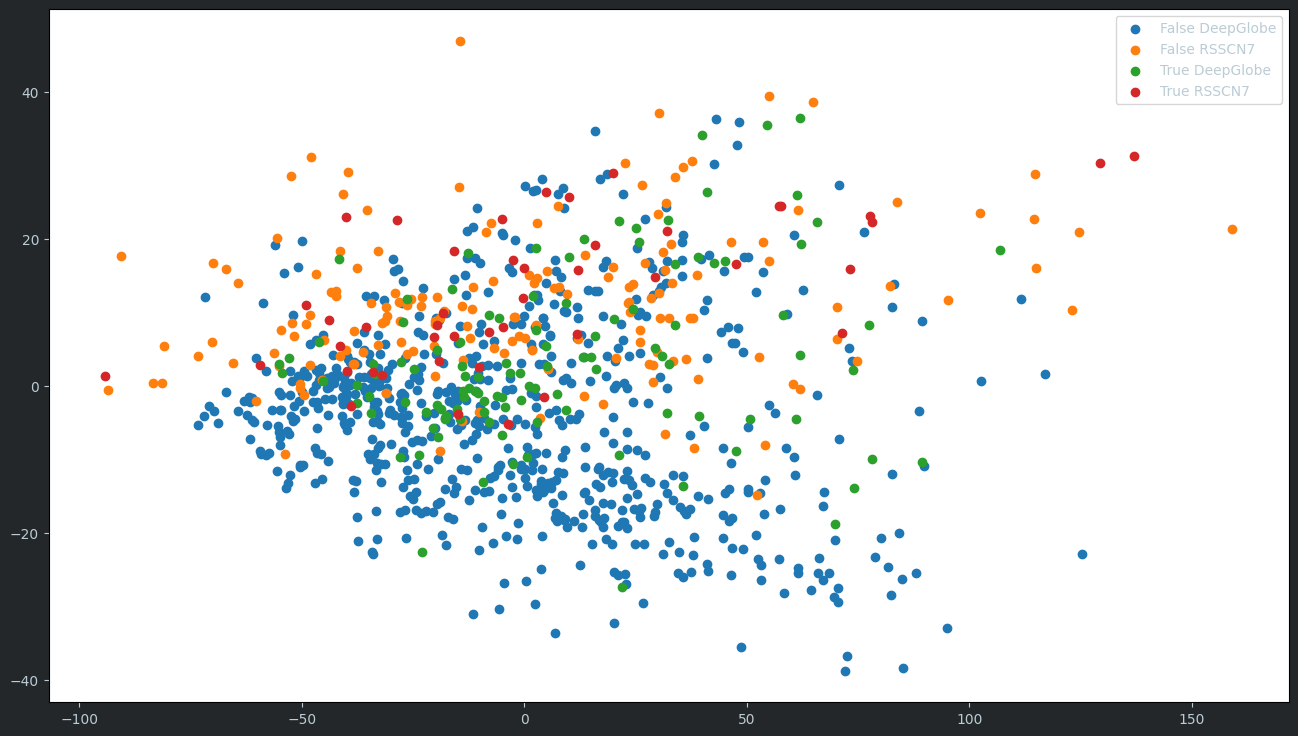

In [8]:
for fire in dataset['fire'].value_counts().index: # can also use x_true
    fire_selector = dataset['fire'][:sample_size] == fire
    for source in dataset['img_source'].value_counts().index:
        source_selector = dataset['img_source'][:sample_size] == source
        selector = fire_selector & source_selector
        plt.scatter(pca_sample[selector,0], pca_sample[selector,1], label=f'{fire} {source}')
plt.legend()

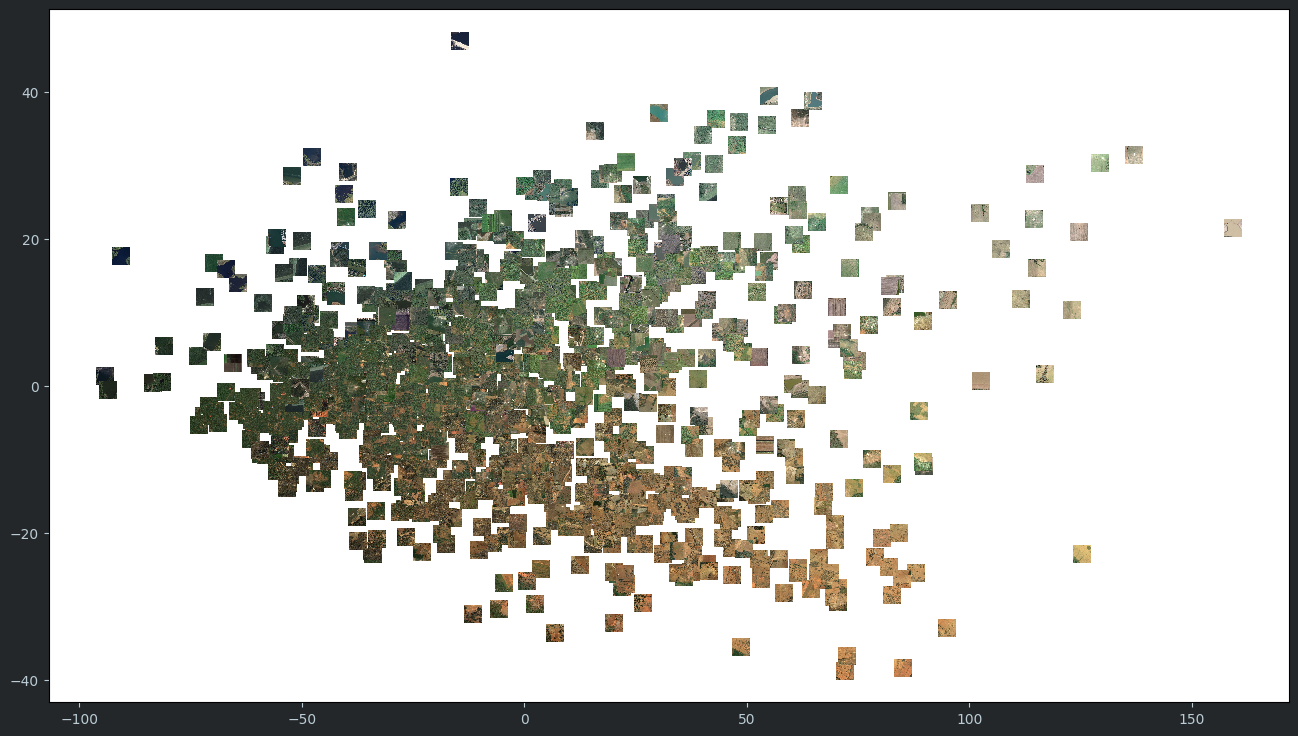

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots()
ax.scatter(pca_sample[:,0], pca_sample[:,1]) 

for img, (x, y) in zip(sample, pca_sample[:, :2]):
    ab = AnnotationBbox(OffsetImage(img, zoom=0.05), (x, y), frameon=False)
    ax.add_artist(ab)